In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms

# Define U-Net architecture
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 1, kernel_size=2, stride=2)
        )

    def forward(self, x):
        x1 = self.encoder(x)
        x2 = self.decoder(x1)
        return x2

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load MNIST dataset and split into train, validation, and test sets
transform = transforms.Compose([transforms.ToTensor()])
full_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

train_size = int(0.8 * len(full_dataset))
val_size = int(0.1 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

# Instantiate the U-Net model and move it to the device
model = UNet().to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)

        # Forward pass
        output = model(data)

        # Compute loss
        loss = criterion(output, data)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Batch {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}")

    # Validation loop
    model.eval()
    with torch.no_grad():
        total_loss = 0.0
        for data, _ in val_loader:
            data = data.to(device)
            output = model(data)
            total_loss += criterion(output, data).item()

        average_loss = total_loss / len(val_loader)
        print(f"Validation Loss: {average_loss:.4f}")

print("Training complete!")

# Save the trained model
torch.save(model.state_dict(), 'unet_mnist.pth')

Epoch 1/10, Batch 0/750, Loss: 0.4551
Epoch 1/10, Batch 100/750, Loss: 0.0079
Epoch 1/10, Batch 200/750, Loss: 0.0026
Epoch 1/10, Batch 300/750, Loss: 0.0017
Epoch 1/10, Batch 400/750, Loss: 0.0012
Epoch 1/10, Batch 500/750, Loss: 0.0009
Epoch 1/10, Batch 600/750, Loss: 0.0009
Epoch 1/10, Batch 700/750, Loss: 0.0008
Validation Loss: 0.0007
Epoch 2/10, Batch 0/750, Loss: 0.0007
Epoch 2/10, Batch 100/750, Loss: 0.0007
Epoch 2/10, Batch 200/750, Loss: 0.0006
Epoch 2/10, Batch 300/750, Loss: 0.0005
Epoch 2/10, Batch 400/750, Loss: 0.0005
Epoch 2/10, Batch 500/750, Loss: 0.0005
Epoch 2/10, Batch 600/750, Loss: 0.0005
Epoch 2/10, Batch 700/750, Loss: 0.0007
Validation Loss: 0.0004
Epoch 3/10, Batch 0/750, Loss: 0.0005
Epoch 3/10, Batch 100/750, Loss: 0.0004
Epoch 3/10, Batch 200/750, Loss: 0.0004
Epoch 3/10, Batch 300/750, Loss: 0.0004
Epoch 3/10, Batch 400/750, Loss: 0.0004
Epoch 3/10, Batch 500/750, Loss: 0.0003
Epoch 3/10, Batch 600/750, Loss: 0.0004
Epoch 3/10, Batch 700/750, Loss: 0.000

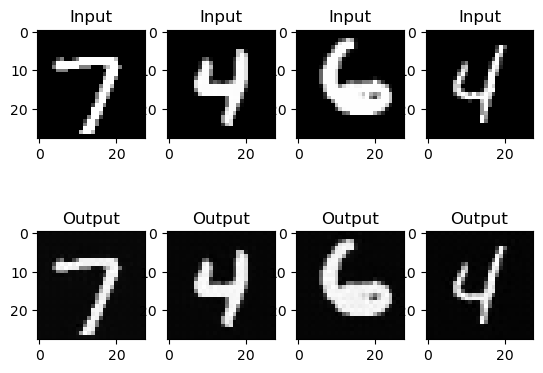

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

# Define U-Net architecture (make sure it matches the architecture used during training)
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 1, kernel_size=2, stride=2)
        )

    def forward(self, x):
        x1 = self.encoder(x)
        x2 = self.decoder(x1)
        return x2

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the trained model
model = UNet()
model.load_state_dict(torch.load('unet_mnist.pth'))
model.to(device)
model.eval()

# Transform for input image
transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                transforms.ToTensor()])

# # Load the test dataset
# test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
# test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

# Testing loop
with torch.no_grad():
    for batch_idx, (data, _) in enumerate(test_loader):
        data = data.to(device)

        # Forward pass
        output = model(data)

        # Visualize the input and output for the first batch
        if batch_idx == 0:
            for i in range(min(4, data.size(0))):  # Visualize up to 4 samples
                plt.subplot(2, 4, i + 1)
                plt.title('Input')
                plt.imshow(data[i].cpu().squeeze().numpy(), cmap='gray')

                plt.subplot(2, 4, i + 5)
                plt.title('Output')
                plt.imshow(output[i].cpu().squeeze().numpy(), cmap='gray')

            plt.show()

# You can also calculate metrics like accuracy, precision, recall, etc., for more detailed evaluation.